In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import datetime

In [2]:
taxi_summary_final = "taxi_final_df.csv"
taxi_final_df = pd.read_csv(taxi_summary_final)
taxi_final_df.head()

,Unnamed: 0,Date,Ride Count
0,0,2014-01-01,420810
1,1,2014-01-02,359958
2,2,2014-01-03,275470
3,3,2014-01-04,417499
4,4,2014-01-05,388542


In [3]:
clean_weather ="clean_weather_data.csv"
clean_weather_df = pd.read_csv(clean_weather)
clean_weather_df.head()

,Unnamed: 0,Date,Precipitation Score,Avg Temp
0,0,1/1/2014,0.000000,27.137750
1,1,1/2/2014,0.173913,27.740496
2,2,1/3/2014,0.829268,15.223122
3,3,1/4/2014,0.208333,12.855500
4,4,1/5/2014,0.593750,24.884375


In [4]:
# cleaning up the date formatting

weatherdate = list(clean_weather_df["Date"])
weatherpscore = list(clean_weather_df["Precipitation Score"])
weathertemp = list(clean_weather_df["Avg Temp"])

fixedweatherdate = []

for date in weatherdate:
    oldformat = datetime.strptime(date, "%m/%d/%Y")
    newformat = datetime.strftime(oldformat, "%Y-%m-%d")
    fixedweatherdate.append(newformat)
    
cleanweather = {
    "Date": fixedweatherdate,
    "Precipitation Score": weatherpscore,
    "Avg Temp": weathertemp
}

clean_weather_df = pd.DataFrame(cleanweather)
clean_weather_df.head()


,Date,Precipitation Score,Avg Temp
0,2014-01-01,0.000000,27.137750
1,2014-01-02,0.173913,27.740496
2,2014-01-03,0.829268,15.223122
3,2014-01-04,0.208333,12.855500
4,2014-01-05,0.593750,24.884375


In [5]:
uber_ridecount_by_date="uber-trip-data/uber_ridecount_by_date_for_plotting.csv"
uber_ridecount_by_date_df = pd.read_csv(uber_ridecount_by_date)
uber_ridecount_by_date_df.head()

,Unnamed: 0,Date,Ride Count
0,0,2014-04-01,14546
1,1,2014-04-02,17474
2,2,2014-04-03,20701
3,3,2014-04-04,26714
4,4,2014-04-05,19521


In [6]:
# create merged DF for data
weatherandtaxi_df= pd.merge(taxi_final_df, clean_weather_df, how="left", on ="Date")
weatherandtaxiclean_df = weatherandtaxi_df.drop(["Unnamed: 0"], axis=1)
weatherandtaxiclean_df



alldata_df = pd.merge(weatherandtaxiclean_df, uber_ridecount_by_date_df, how="left", on="Date")

alldataclean_df = alldata_df.drop(["Unnamed: 0"], axis=1)
alldataclean_df = alldataclean_df.rename(columns = {"Ride Count_x": "Taxi Ride Count", "Ride Count_y": "Uber Ride Count"})
alldataclean_df = alldataclean_df[["Date", "Taxi Ride Count", "Uber Ride Count", "Precipitation Score", "Avg Temp"]]

# conversions in case
alldataclean_df["Precipitation %"] = alldataclean_df["Precipitation Score"] * 100
alldataclean_df["Taxi Ride Count in 10Ks"] = alldataclean_df["Taxi Ride Count"] / 10000
alldataclean_df["Uber Ride Count in 10Ks"] = alldataclean_df["Uber Ride Count"] / 10000

alldataclean_df.head()

,Date,Taxi Ride Count,Uber Ride Count,Precipitation Score,Avg Temp,Precipitation %,Taxi Ride Count in 10Ks,Uber Ride Count in 10Ks
0,2014-01-01,420810,NaN,0.000000,27.137750,0.000000,42.0810,NaN
1,2014-01-02,359958,NaN,0.173913,27.740496,17.391304,35.9958,NaN
2,2014-01-03,275470,NaN,0.829268,15.223122,82.926829,27.5470,NaN
3,2014-01-04,417499,NaN,0.208333,12.855500,20.833333,41.7499,NaN
4,2014-01-05,388542,NaN,0.593750,24.884375,59.375000,38.8542,NaN


In [8]:
# creating a date list for the dates

dates = list(alldataclean_df["Date"])
dates_list = [datetime.strptime(date, "%Y-%m-%d").date() for date in dates]
dates_list

[datetime.date(2014, 1, 1),
 datetime.date(2014, 1, 2),
 datetime.date(2014, 1, 3),
 datetime.date(2014, 1, 4),
 datetime.date(2014, 1, 5),
 datetime.date(2014, 1, 6),
 datetime.date(2014, 1, 7),
 datetime.date(2014, 1, 8),
 datetime.date(2014, 1, 9),
 datetime.date(2014, 1, 10),
 datetime.date(2014, 1, 11),
 datetime.date(2014, 1, 12),
 datetime.date(2014, 1, 13),
 datetime.date(2014, 1, 14),
 datetime.date(2014, 1, 15),
 datetime.date(2014, 1, 16),
 datetime.date(2014, 1, 17),
 datetime.date(2014, 1, 18),
 datetime.date(2014, 1, 19),
 datetime.date(2014, 1, 20),
 datetime.date(2014, 1, 21),
 datetime.date(2014, 1, 22),
 datetime.date(2014, 1, 23),
 datetime.date(2014, 1, 24),
 datetime.date(2014, 1, 25),
 datetime.date(2014, 1, 26),
 datetime.date(2014, 1, 27),
 datetime.date(2014, 1, 28),
 datetime.date(2014, 1, 29),
 datetime.date(2014, 1, 30),
 datetime.date(2014, 1, 31),
 datetime.date(2014, 2, 1),
 datetime.date(2014, 2, 2),
 datetime.date(2014, 2, 3),
 datetime.date(2014, 2, 4)

In [ ]:
# initial list creation
# tdate_list = list(taxi_final_df["Date"])
# tridect_list = list(taxi_final_df["Ride Count"])
# wdate_list = list(clean_weather_df["Date"])
# wpscore_list = list(clean_weather_df["Precipitation Score"])
# wavgtemp_list = list(clean_weather_df["Avg Temp"])
# udate_list = list(uber_ridecount_by_date_df["Date"])
# uridect_list = list(uber_ridecount_by_date_df["Ride Count"])

In [ ]:
# list updates for scaling
# making the pscore (average of a 1/0 binary for multiple hours in the day) into a percentage of precipitation
# wpercentprec_list = []
# percent = 0

# for x in wpscore_list:
#     percent = x * 100
#     wpercentprec_list.append(percent)
    
# # setting the ride counts into the ten thousands, so most of our data falls into the 100 range
# tridect_norm_list = []
# uridect_norm_list = []

# count = 0
# for x in tridect_list:
#     count = x / 10000
#     tridect_norm_list.append(count)
    
# for x in uridect_list:
#     count = x / 10000
#     uridect_norm_list.append(count)
    

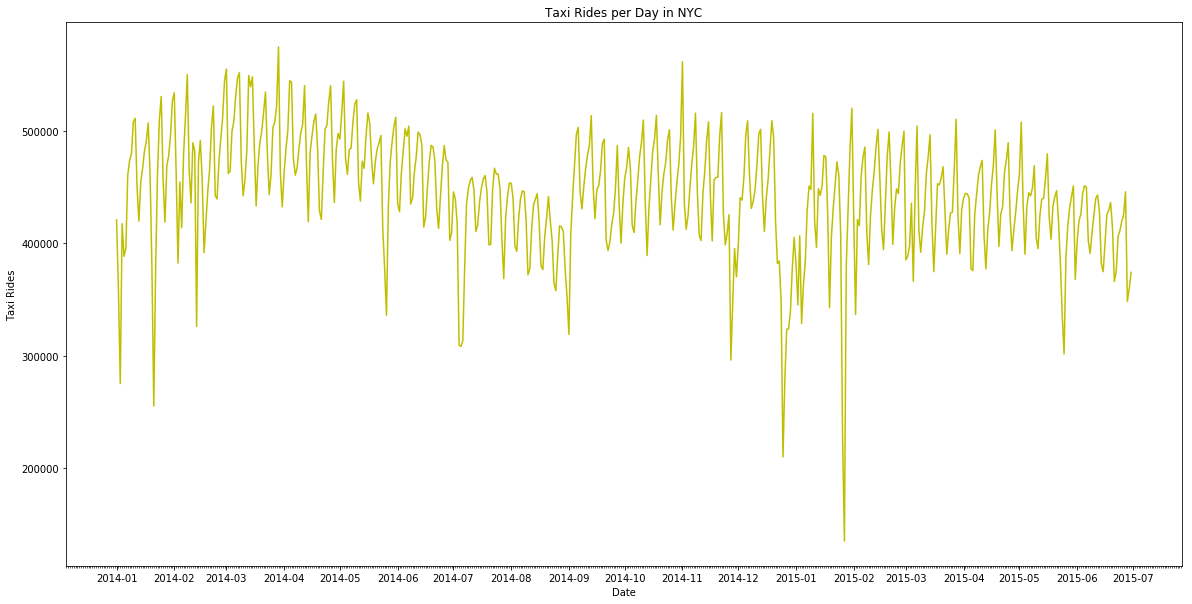

In [9]:
# taxi plot

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(dates_list, alldataclean_df["Taxi Ride Count"], color='y')
ax1.set_xlabel('Date')
ax1.set_ylabel('Taxi Rides')

# labeling
years = mdates.YearLocator() # every year
months = mdates.MonthLocator()
days = mdates.DayLocator() # every month
yearsFmt = mdates.DateFormatter('%Y-%m')


ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(days)

#datemin = datetime(dates_list[0])
#datemax = datetime(dates_list[len(dates_list)-1])
#ax.set_xlim(datemin, datemax)


# displaying plot
plt.title('Taxi Rides per Day in NYC')
plt.show()

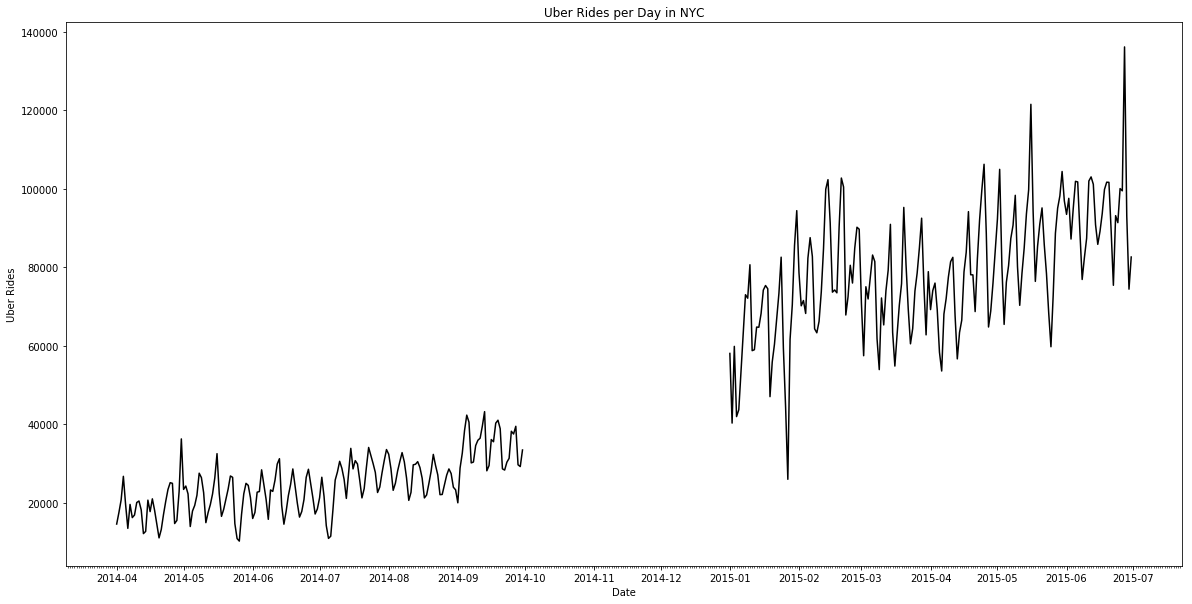

In [11]:
# uber plot

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(dates_list, alldataclean_df["Uber Ride Count"], color='black')
ax1.set_xlabel('Date')
ax1.set_ylabel('Uber Rides')

# labeling 
years = mdates.YearLocator() # every year
months = mdates.MonthLocator()  
days = mdates.DayLocator() # every month
yearsFmt = mdates.DateFormatter('%Y-%m')


ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(days)

# datemin = datetime(dates_list[0])
# datemax = datetime(dates_list[len(dates_list)-1])
# ax.set_xlim(datemin, datemax)


# displaying plot
plt.title('Uber Rides per Day in NYC')
plt.show()

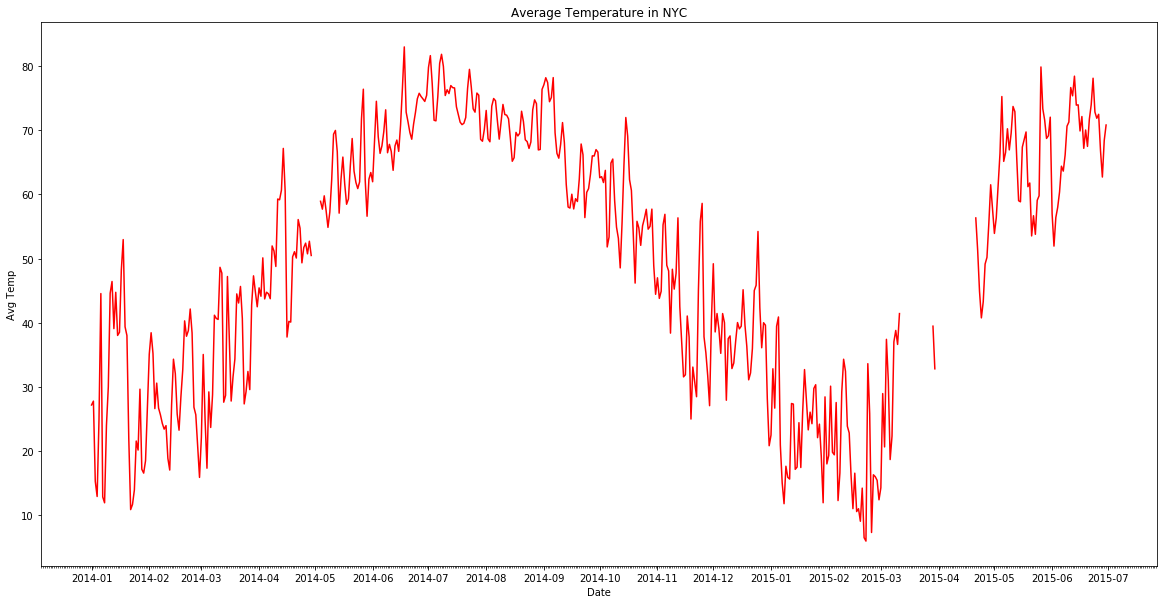

In [13]:
# temp plot
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(dates_list, alldataclean_df["Avg Temp"], color='r')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Temp')

# labeling
years = mdates.YearLocator() # every year
months = mdates.MonthLocator()
days = mdates.DayLocator() # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(days)

# displaying plot
plt.title('Average Temperature in NYC')
plt.show()

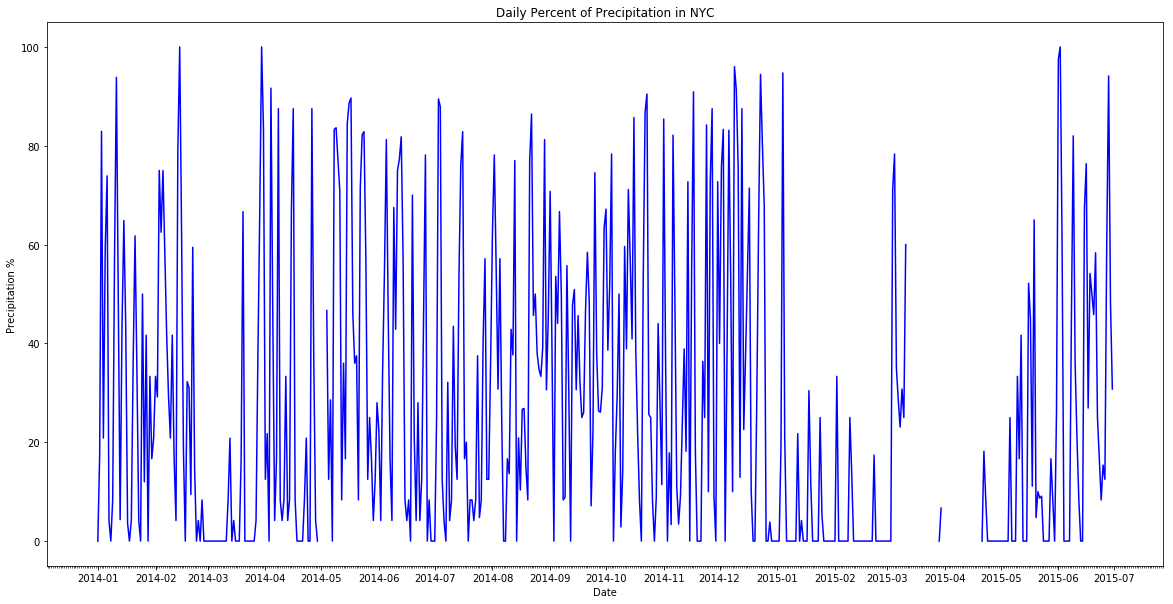

In [14]:
# precip plot
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(dates_list, alldataclean_df["Precipitation %"], color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Precipitation %')

# labeling
years = mdates.YearLocator() # every year
months = mdates.MonthLocator()
days = mdates.DayLocator() # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(days)

# displaying plot
plt.title('Daily Percent of Precipitation in NYC')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

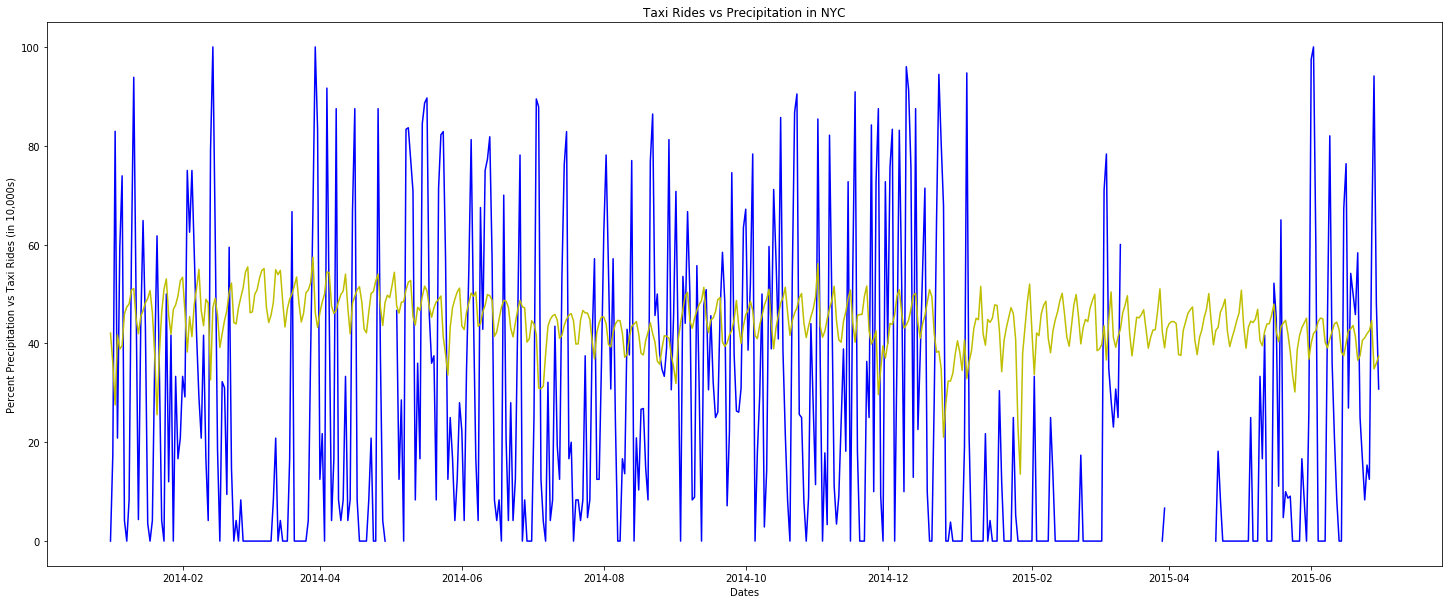

In [19]:
# taxi vs precipitation
plt.figure(figsize=(25,10))

# labeling 
plt.xlabel('Dates')
plt.ylabel("Percent Precipitation vs Taxi Rides (in 10,000s)")
plt.title('Taxi Rides vs Precipitation in NYC')

plt.plot(dates_list, alldataclean_df["Precipitation %"], color='b', label="Precipitation")
plt.plot(dates_list, alldataclean_df["Taxi Ride Count in 10Ks"], color='y', label="Taxi Rides")
years = mdates.YearLocator() # every year
months = mdates.MonthLocator()
days = mdates.DayLocator() # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

plt.xaxis.set_major_locator(months)
plt.xaxis.set_major_formatter(yearsFmt)
plt.xaxis.set_minor_locator(days)


lgnd = plt.legend(loc="upper right", title="Data ", scatterpoints=1, fontsize=8)

# displaying plot
plt.show()





In [ ]:
# taxi vs precipitation
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.set_xlabel('Date')
ax1.set_ylabel('Percent Precipitation')
ax1.plot(alldataclean_df["Date"], alldataclean_df["Precipitation %"], color='b', label="Precipitation")
ax1.tick_params(axis='y')

years = mdates.YearLocator() # every year
months = mdates.MonthLocator()
days = mdates.DayLocator() # every month
yearsFmt = mdates.DateFormatter('%Y-%m')


# ax1.xaxis.set_major_locator(months)
# ax1.xaxis.set_major_formatter(yearsFmt)
# ax1.xaxis.set_minor_locator(days)

ax2 = ax1.twinx() 
ax2.set_ylabel('Taxi Ride Count') 
ax2.plot(alldataclean_df["Date"], alldataclean_df["Taxi Ride Count"], color="y", label="Taxi Ride Count")
ax2.tick_params(axis='y')


# # labeling 
# datemin = datetime.dt(dates_list[0])
# datemax = datetime.dt(dates_list[len(dates_list)-1])
# ax1.set_xlim(datemin, datemax)
plt.title('Taxi Rides vs Precipitation in NYC')

# displaying plot
# plt.show()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [ ]:
lenweather = len(wdate_list)
lenuber= len(udate_list)
lentaxi = len(tdate_list)

print(f"Weather {lenweather}, Uber {lenuber}, Taxi {lentaxi}")

In [ ]:

## Delete multiple columns from the dataframe
#merged_final_df = merged_final_df.drop(["Unnamed: 0_x", "Unnamed: 0_y", "Unnamed: 0"], axis=1)
#merged_final_df.head()

In [ ]:
#merged_final_df= merged_final_df.rename(columns = {"Ride Count_x": "Taxi Ride Count", "Ride Count_y": "Uber Ride Count"})
#merged_final_df.head()

In [ ]:

#x_axis =np.arange(len(merged_final_df))
##tick_locations =[value for value in x_axis]
#plt.figure(figsize =(20, 3))
#plt.bar(x_axis, merged_final_df["Avg Temp"], color='r', alpha =0.5, align ="center")
#plt.xticks(tick_locations, merged_final_df["Uber Ride Count"], rotation="vertical")
#plt.show

In [ ]:
# setting up a list for the dates -- could also use the setting a variable = list(df["column"]) 
date_list = merged_final_df["Date"].unique()
precipitation_list = merged_final_df["Precipitation Score"]
average_temp_list =merged_final_df["Avg Temp"]


# creating a list for ridecount
uber_ridecount_list = [merged_final_df.loc[x, "Uber Ride Count"] for x in date_list]
taxi_ridecount_list = [merged_final_df.loc[x, "Taxi Ride Count"]for x in date_list]
# plotting the lists

plt.plot(date_list, ridecount_list, color='g')

# labeling plot
plt.xlabel('Dates')
plt.ylabel('Rides')
plt.title('Uber Rides per Day in NYC')
# displaying plot
plt.show()

In [ ]:
##lat vs temp
#plt.scatter(merged_final_df["Avg Temp"], merged_final_df["Uber Ride Count"], marker="o")
#plt.title("City Latitude VS Maximum Temperature")
#plt.ylabel("Avg Temp")
#plt.xlabel("Uber Ride Count")
#plt.grid(True)
#plt.xlim(-10,100)
#
#
##plt.savefig("latvstemp.png")
#plt.show()
#

In [ ]:
#x = [1,2,3,4]
#y = [0.5,0.6,0.9,0.85]
#plt.plot(x,y,'-')
#tick_locations =
#plt.xticks(tick_locations, merged_final_df["Uber Ride Count"], rotation="vertical")
#plt.grid()
#plt.show()

In [ ]:
# plotting the lists

#plt.plot("Date", "Uber Ride Count", color='g')

# labeling plot
#plt.xlabel('Dates')
#plt.ylabel('Rides')
#plt.title('Uber Rides per Day in NYC')
# displaying plot
#plt.show()